# This python code is for project : Bike Renting 
#### The objective of this Case is Predication of bike rental count on daily based on the environmental and seasonal settings

### I am going to divide whole project in to 8 parts:
#### 1.) Define and categorize problem statement
#### 2.) Gather the data
#### 3.) Prepare data for consumption
#### 4.) Perform Exploratory Data Analysis
#### 5.) Models Building
#### 6.) Evaluate and compare Model performances and choose the best model
#### 7.) Hypertune the selected model
#### 8.) Produce sample output with tuned model

In [ ]:
## ----------- Part 1: Define and categorize the problem statement --------------
#### The problem statement is to "Predict the daily bike rental count based on the environmental and seasonal settings"
##### This is clearly a 'Supervised machine learning regression problem' to predict a number based on the input features

## ----------- Part 1 ends here ----------------- 

In [211]:
##------------- Import all the required libraries--------------

## Import all the required libraries
import os
import pandas as pd
import numpy as np

#---- for model building
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cross_validation import train_test_split

#---- for visualization---
import matplotlib.pyplot as plt 
import seaborn as sn

#------ for model evaluation -----
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#---- For handling warnings
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [212]:
## ------------------- Part 2: Gather the data -----------------

### Here data is provided as .csv file with the problem.
### Let's import the data 

bike = pd.read_csv("D:/DataScience_Edwisor/edWisor/Projects/Bike_Rental/Dataset/day.csv")
bike.head()

##---------- Part 2 ends here --------------------------

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# ------------Part 3 : Prepare the data for consumption(Data Cleaning) ---------------
#### 3a.) Check the shape/properties of the data
#### 3b.) Completing -- Perform missing value analysis and impute missing values if necessary
#### 3c.) Correcting -- Check for any invalid data inputs , for outliers or for any out of place data
#### 3d.) Creating -- Feature extraction . Extract any new features from existing features if required
#### 3e.) Converting -- Converting data to proper formats

In [213]:
#### --------3a.) Check the shape/properties of the data
## Check the shape of the data
bike.shape

# what we can infer:
## ->the dataset has 731 observations and 16 features

(731, 16)

In [214]:
## Check the properties of the data
bike.info()
# what we can infer:
# ->There are no null values in the dataset
# -> The datatypes are int,float and object 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [215]:
# -------------- 3b.) Completing -- Perform missing value analysis and impute missing values if necessary
# Although we have already seen above thatthere are no null values in the dataset. Lets try other way to confirm this
#Checking nulls
bike.isnull().sum().sort_values(ascending=False)

# what we can infer:
# ->There are no null values in the dataset.If it had, then eithere the rows/columns had to be dropped or the null values be imputed based on the % of null values

cnt           0
registered    0
casual        0
windspeed     0
hum           0
atemp         0
temp          0
weathersit    0
workingday    0
weekday       0
holiday       0
mnth          0
yr            0
season        0
dteday        0
instant       0
dtype: int64

In [216]:
#### ------------------3c.) Correcting -- Check for any invalid data inputs , for outliers or for any out of place data
# From above observations data doesnot seem to have any invalid datatypes to be handled
# However feature 'instant' doesnot seem relevant to our analysis. Lets drop it
bike = bike.drop(columns=['instant'])
# Let's check for the outliers in EDA step

In [217]:
#### -----------------3d.) Creating -- Feature extraction . Extract any new features from existing features if required
bike.head()
bike.dteday.describe()
## We can see that here we have 'dteday', which gives us the exact date. This features has 2 years of data(2011, 2012), all through 12 months(1 to 12) of a year
## Now, year and month information is given in 'yr' and 'mnth' column respectively.
## However, date(day of month) information is not saperately given.
## Lets extract 'date' from 'dteday' column
bike['dteday'] = pd.to_datetime(bike['dteday'])
bike['date'] = bike['dteday'].dt.day

## Now, 'dteday' column is not required, since we already have year, month, date info in other columns. So lets drop it.
bike = bike.drop(columns=['dteday'])
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,3
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,4
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,5


In [218]:
#### 3e.) ------- Converting -- Converting data to proper formats
#We can clearly see that "season", "yr","mnth","holiday","weekday","workingday","weathersit","date" are categories,rather than continous variable.
#Let them convert to categories
categoryFeatureList = ["season", "yr","mnth","holiday","weekday","workingday","weathersit","date"]
for var in categoryFeatureList:
    bike[var] = bike[var].astype("category")
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
season        731 non-null category
yr            731 non-null category
mnth          731 non-null category
holiday       731 non-null category
weekday       731 non-null category
workingday    731 non-null category
weathersit    731 non-null category
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
date          731 non-null category
dtypes: category(8), float64(4), int64(3)
memory usage: 48.6 KB


In [ ]:
# ------------Part 3 : Prepare the data for consumption(Data Cleaning) ENDS here---------------

In [ ]:
# ------------Part 4 : Exploratory Data Analysis(EDA) STARTS here -----------

In [ ]:
#----- 4 a.) Outlier Analysis -----------

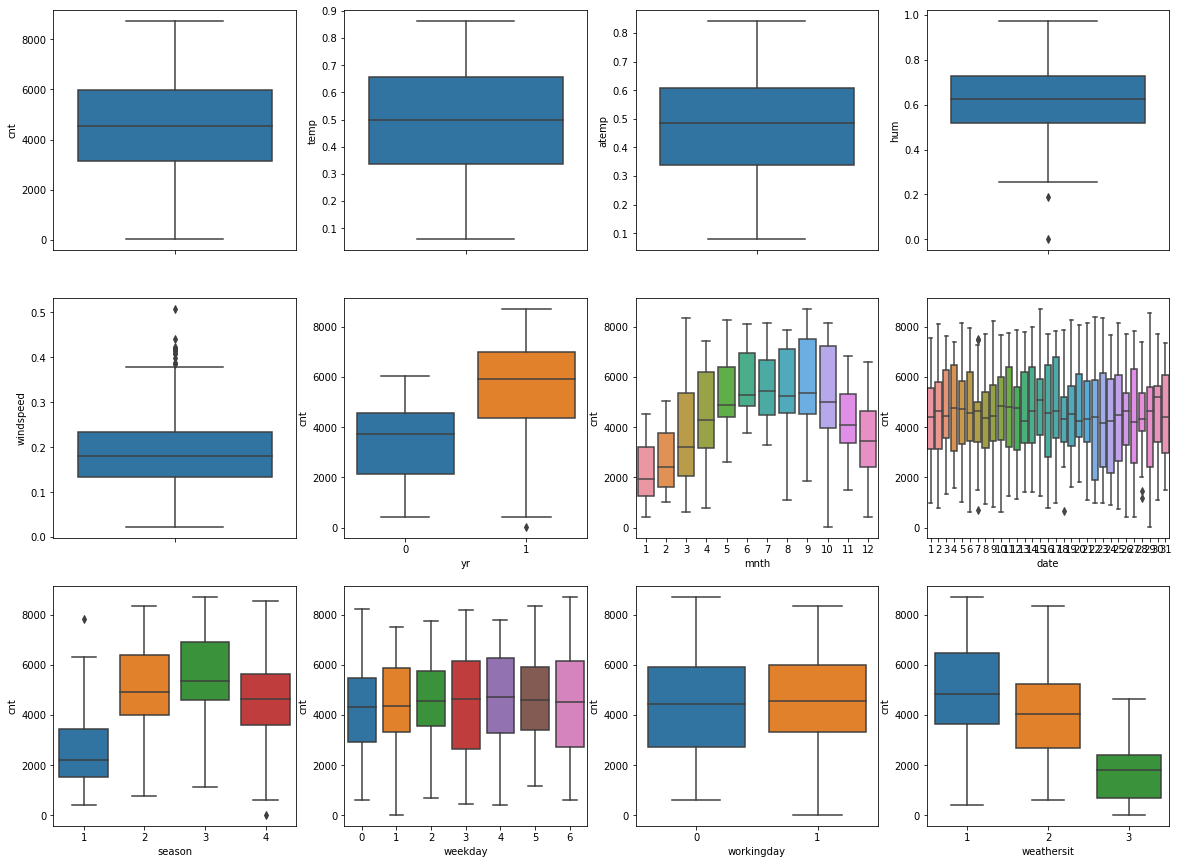

In [219]:
## -- Lets do the outlier analysis ----
## -- Visualize continous variables(cnt,temp,atemp,hum,windspeed) and 
##  count with respect to categorical variables("season", "yr","mnth","holiday","weekday","workingday","weathersit","date")with boxplots ---
fig, axes = plt.subplots(nrows=3,ncols=4)
fig.set_size_inches(20,15)

#-- Plot total counts on y bar
sn.boxplot(data=bike, y="cnt",ax=axes[0][0])

#-- Plot temp on y bar
sn.boxplot(data=bike, y="temp",ax=axes[0][1])

#-- Plot atemp on y bar
sn.boxplot(data=bike, y="atemp",ax=axes[0][2])

#-- Plot hum on y bar
sn.boxplot(data=bike, y="hum",ax=axes[0][3])

#-- Plot windspeed on y bar
sn.boxplot(data=bike, y="windspeed",ax=axes[1][0])

#-- Plot total counts on y-bar and 'yr' on x-bar
sn.boxplot(data=bike,y="cnt",x="yr",ax=axes[1][1])

#-- Plot total counts on y-bar and 'mnth' on x-bar
sn.boxplot(data=bike,y="cnt",x="mnth",ax=axes[1][2])

#-- Plot total counts on y-bar and 'date' on x-bar
sn.boxplot(data=bike,y="cnt",x="date",ax=axes[1][3])

#-- Plot total counts on y-bar and 'season' on x-bar
sn.boxplot(data=bike,y="cnt",x="season",ax=axes[2][0])

#-- Plot total counts on y-bar and 'weekday' on x-bar
sn.boxplot(data=bike,y="cnt",x="weekday",ax=axes[2][1])

#-- Plot total counts on y-bar and 'workingday' on x-bar
sn.boxplot(data=bike,y="cnt",x="workingday",ax=axes[2][2])

#-- Plot total counts on y-bar and 'weathersit' on x-bar
sn.boxplot(data=bike,y="cnt",x="weathersit",ax=axes[2][3])

In [ ]:
# what we can infer from above boxplots:
# -> Overall, not many outliers. Data seems balanced.
# -> Count values doenot have any outliers
# -> There are some outliers for hum and windspeed. However that seems ok, as it tells dataset has datapoints for extreme weather as well
# Lets keep these outliers for now, till we complete full EDA

In [ ]:
#---- 4b.) Correlation Analysis
#--- Explore continous features
#--- Explore categorical features

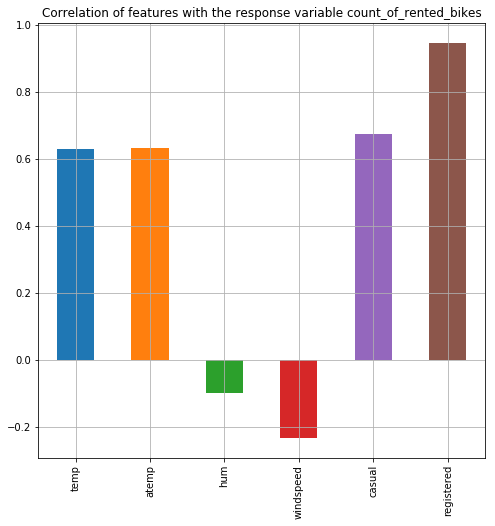

In [220]:
#------------- Explore continous features -----------------
##Explore the correlation btwn the independent continous features with target variabe
corr=bike[['temp','atemp','hum','windspeed','casual','registered']].corrwith(bike.cnt)
corr.plot.bar(figsize=(8,8), title='Correlation of features with the response variable count_of_rented_bikes', grid=True, legend=False, style=None, fontsize=None, colormap=None, label=None)

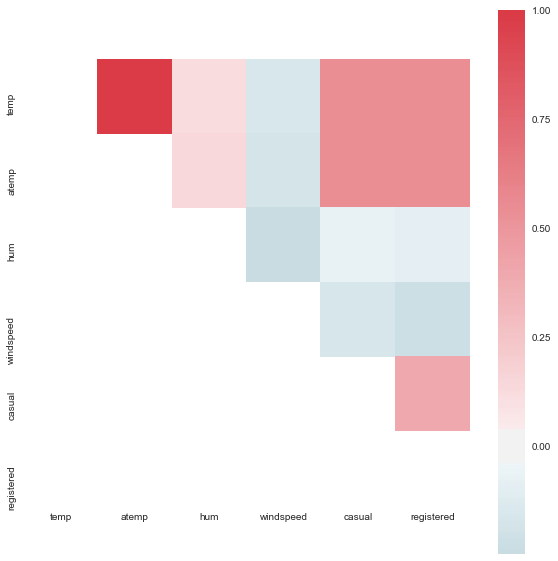

In [221]:
##------heatmap for correlation matrix---------##
##to check multicollinearity ---##

#correlation matrix
sn.set(style='white')
#compute correlation matrix
corr =bike.drop(columns=['cnt']).corr()
#generate a mask for upper triangle#
mask =np.zeros_like(corr, dtype=np.bool)
mask[np.tril_indices_from(mask)]=True
#setuop the matplotlab figure
f,ax=plt.subplots(figsize=(10,10))
#generate a custom diverging colormap
cmap=sn.diverging_palette(220, 10, s=75, l=50, sep=10, n=6, center='light', as_cmap=True)
#heatmap
sn.heatmap(corr, vmin=None, vmax=None, cmap=cmap, center=0, robust=False, fmt='.2g', linewidths=0, linecolor='white', square=True, mask=mask, ax=None)

In [ ]:
#Clearly, from above heatmap, we can se that the dataset has multicolinearity. 'temp' and 'atemp' are highly correlated.
#Will need to drop one of them.

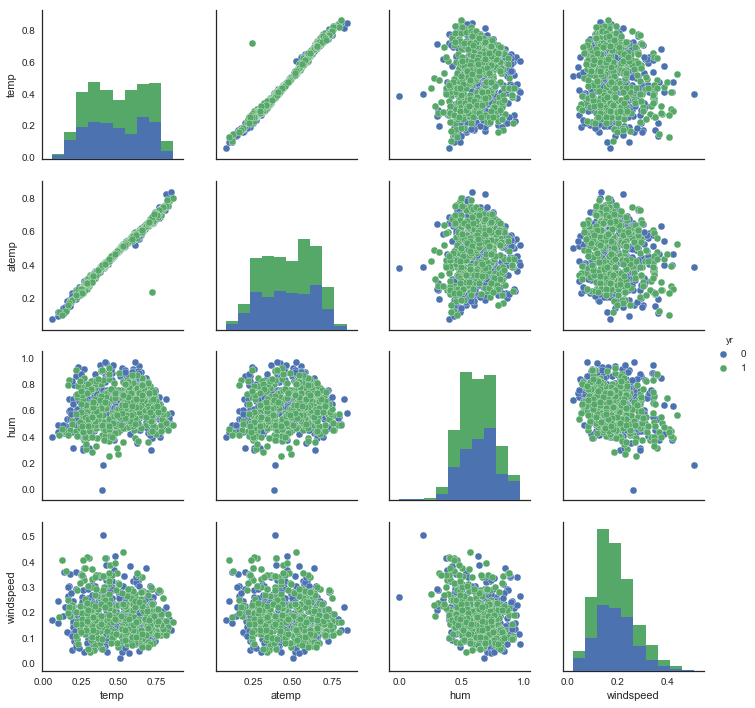

In [222]:
#Visualize the relationship among all continous variables using pairplots
NumericFeatureList=["temp","atemp","hum","windspeed"]
sn.pairplot(bike,hue = 'yr',vars=NumericFeatureList)

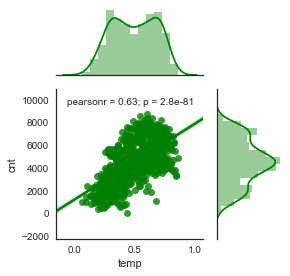

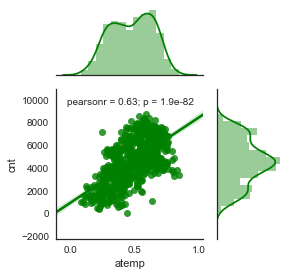

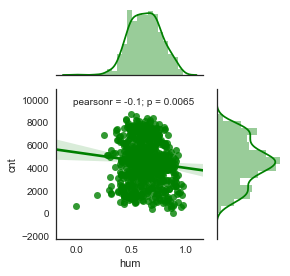

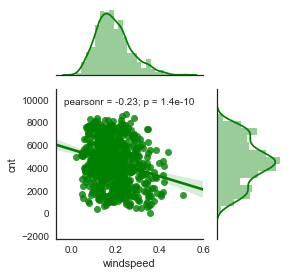

In [223]:
#Lets explore some more, the relationship btwn independent continous variables and dependent variable using JOINT PLOTs
#graph individual numeric features by count of rented bikes
for i in NumericFeatureList:
    sn.jointplot(i, "cnt", data=bike, kind='reg', color='g', size=4, ratio=2, space=0.2, dropna=True, xlim=None, ylim=None, joint_kws=None, marginal_kws=None, annot_kws=None)

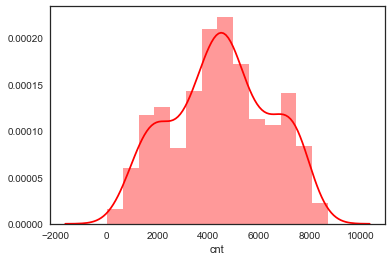

In [224]:
# Check the distribution plot of target variable 'cnt'
sn.distplot(bike["cnt"],color ='r')

In [ ]:
# what we can infer from above analysis of continous variables:
# -> Target variable 'cnt' is almost normally distributed, which is a good thing.
# -> From correlation with dependent variable cnt, we can see that 'casual','registered' are very highly correlated to cnt. These are actually 'leak variablles'. Needs to be dropped from the dataset
# -> 'hum' has low correlation with 'cnt'. For ow, lets keep it.
# -> atemp and temp has good correlation with 'cnt'
# -> From heatmap, we can see that atemp and temp are highly correlated. So we need to drop 1 to remove multicollinearity.
# -> Since, as seen from jointplot,p(atemp) < p(temp), we can drop 'temp' and retain 'atemp' in the dataset

In [ ]:
#------------- Explore categorical features ------------------

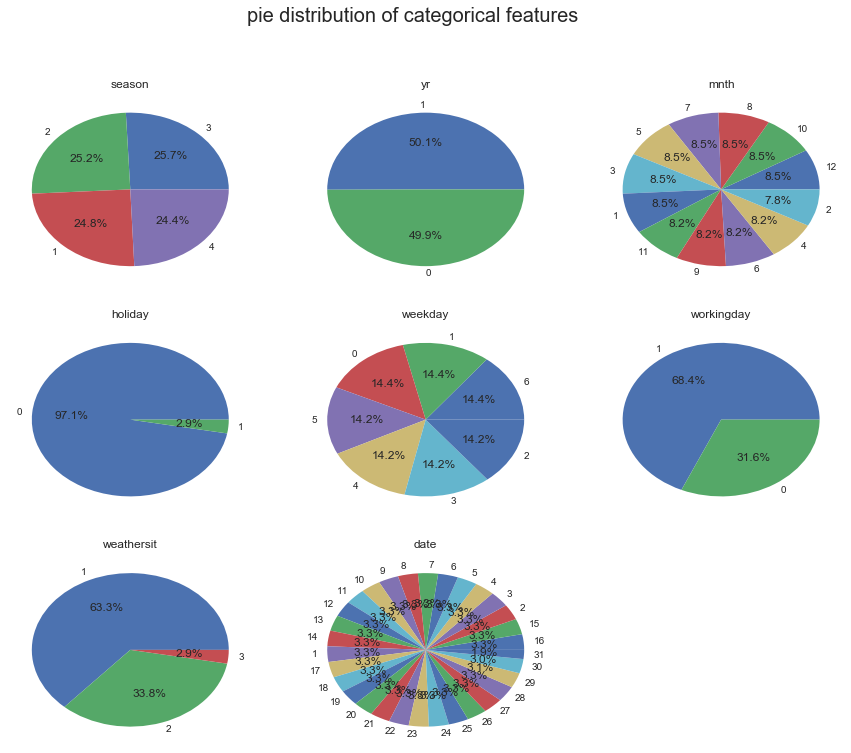

In [225]:
##checking the pie chart distribution of categorical variables
#bike_piplot = bike.drop(columns=['instant','dteday','temp','atemp','hum','windspeed','casual','registered','cnt'])
bike_piplot=bike[categoryFeatureList]
plt.figure(figsize=(15,12))
plt.suptitle('pie distribution of categorical features', fontsize=20)
for i in range(1,bike_piplot.shape[1]+1):
    plt.subplot(3,3,i)
    f=plt.gca()
    f.set_title(bike_piplot.columns.values[i-1])
    values=bike_piplot.iloc[:,i-1].value_counts(normalize=True).values
    index=bike_piplot.iloc[:,i-1].value_counts(normalize=True).index
    plt.pie(values,labels=index,autopct='%1.1f%%')
#plt.tight_layout()

In [ ]:
#What we can infer from above piplot:
#-> Most of the categorical variables are uniformally distributed, except 'holiday','weathersit','workingday'
#-> This makes sense for 'weathersit', as extreme weather is rare and hence %percentage of extreme weather in whole dataset is low
#-> This makes sense for 'holiday', as number of holidays are less in comparison to working days
#-> This makes sense for 'workingday' for the same reason as above
#-> So, categorical data seems o be pretty much uniformly distributed

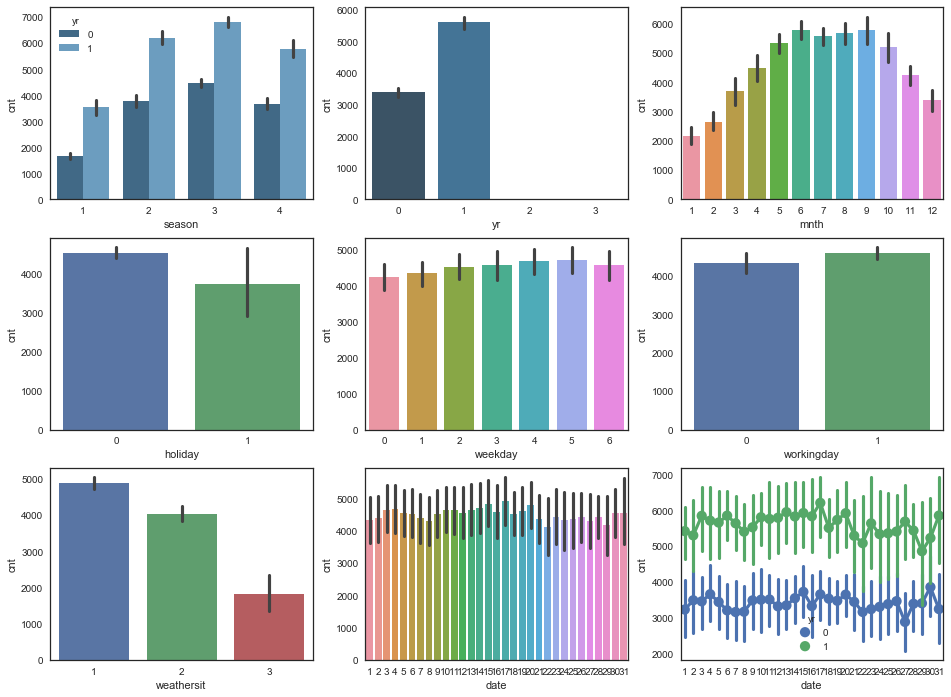

In [226]:
#graph individual categorical features by count
fig, saxis = plt.subplots(3, 3,figsize=(16,12))

sn.barplot(x = 'season', y = 'cnt',hue= 'yr', data=bike, ax = saxis[0,0], palette ="Blues_d")
sn.barplot(x = 'yr', y = 'cnt', order=[0,1,2,3], data=bike, ax = saxis[0,1], palette ="Blues_d")
sn.barplot(x = 'mnth', y = 'cnt', data=bike, ax = saxis[0,2])
sn.barplot(x = 'holiday', y = 'cnt',  data=bike, ax = saxis[1,0])
sn.barplot(x = 'weekday', y = 'cnt',  data=bike, ax = saxis[1,1])
sn.barplot(x = 'workingday', y = 'cnt', data=bike, ax = saxis[1,2])
sn.barplot(x = 'weathersit', y = 'cnt', data=bike, ax = saxis[2,0])
sn.barplot(x = 'date', y = 'cnt' , data=bike, ax = saxis[2,1])
#sn.pointplot(x = 'weathersit', y = 'cnt', data=bike, ax = saxis[2,0])
sn.pointplot(x='date', y='cnt', hue='yr', data=bike, markers='o', linestyles='-', dodge=False, join=True,ax = saxis[2,2])
#sn.pointplot()

In [91]:
#--- Lets see how these categorical variables individually ffects the count of rented bikes
# Does 'yr' affects count of rented bikes
#--> YES. the count have an upward trend wrt year

#Does 'season' affects count of rented bikes
#--> YES, it seems ppl rent more bikes during season 3 and 2, i.e. highest in fall and summer and less in winter and springs. This makes sense as weather is good to ride during summer and fall.

#Does 'month' affects count of rented bikes
#-->YES.ppl are likely to rent bikes more btwn the months May- October and lowest in month of Jan,Feb and Dec(in that order). This again makes sense, as this trend is in sync with favourable weather conditions

#Does 'holiday' affects count of rented bikes
#--> YES. ppl rent more bikes on non-holiday than holiday. It makes sense as bikers who commute to work/school will be less on holiday.

#Does 'weekday' affects count of rented bikes
#--> To some extent Yes. ppl seems to rent lesser bikes on Sat/ Sun. ie. over the weekend. Again makes sense as school and offices are closed on weekend.
#Monday also has lesser count of rented bikes. It may be possible the ppl visit to other places/cities over weekend and travel back in car on Monday, istead of renting bikes.

#Does 'weather' affects count of rented bikes
#--> Most definately YES. noone rented bike on extreme weather(season=4). ppl rent maximum bikes during a clear day (weathersit=1)

#Does 'date' affects count of rented bikes
#--> Well there is no set trends. It seems to be random. Let explore bit more of it over the 12 months using pointplot
#-->

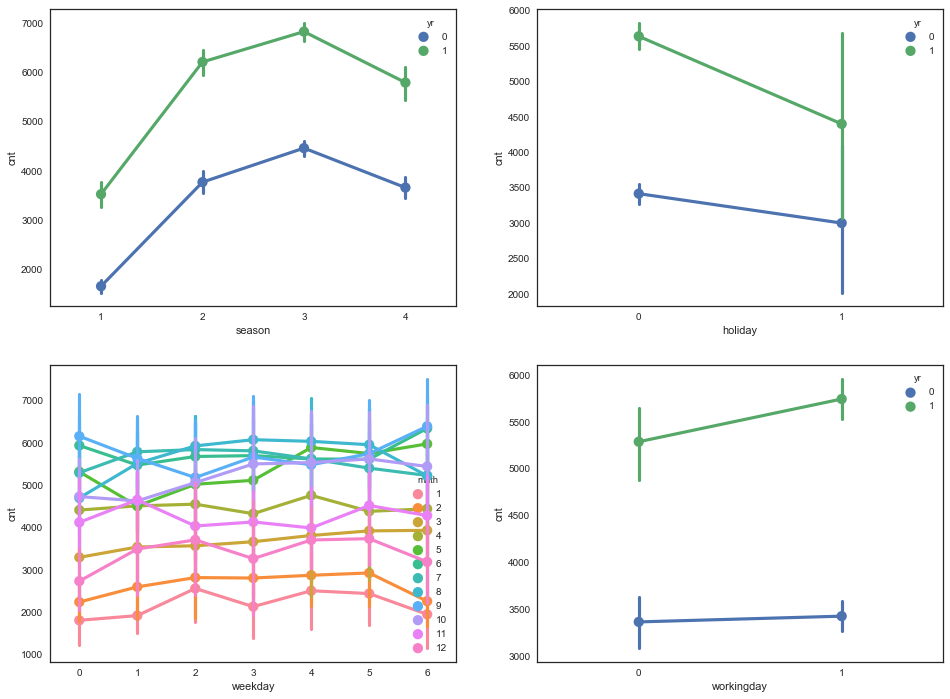

In [227]:
#-- exploring some more pairplots, to see the trends over the years
fig, saxis = plt.subplots(2, 2,figsize=(16,12))
sn.pointplot(x='season', y='cnt', hue='yr', data=bike, markers='o', linestyles='-', dodge=False, join=True,ax = saxis[0,0])
sn.pointplot(x='holiday', y='cnt', hue='yr', data=bike, markers='o', linestyles='-', dodge=False, join=True,ax = saxis[0,1])
sn.pointplot(x='weekday', y='cnt', hue='mnth', data=bike, markers='o', linestyles='-', dodge=False, join=True,ax = saxis[1,0])
sn.pointplot(x='workingday', y='cnt', hue='yr', data=bike, markers='o', linestyles='-', dodge=False, join=True,ax = saxis[1,1])

In [ ]:
#------ Exploratory Data Analysis ENDS Here------------------
# Final observations:
#1.) 'casual' and 'registered' are leak variables. They need to be dropped from the dataset
#2.) 'atemp' and 'temp' are very strongly correlated . Drop 'atemp' from the dataset(since it has higher p-value than 'temp')
#3.) 'date' does not seem to have any affect on count of bikes, it can be dropped from the dataset
#------------------------------------------------------------

In [228]:
#---- Drop the features mentioned above(as part of feature engineering)
bike_aftr_ftr_eng = bike.drop(columns=['casual','registered','temp'])
bike_aftr_ftr_eng.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,date
0,1,0,1,0,6,0,2,0.363625,0.805833,0.160446,985,1
1,1,0,1,0,0,0,2,0.353739,0.696087,0.248539,801,2
2,1,0,1,0,1,1,1,0.189405,0.437273,0.248309,1349,3
3,1,0,1,0,2,1,1,0.212122,0.590435,0.160296,1562,4
4,1,0,1,0,3,1,1,0.229270,0.436957,0.186900,1600,5


In [ ]:
#----------Part 5 : Model Builing starts here ----------------------
#Train the models with both datasets(before and after feature engineering)
#Note: Just to show how feature engineering improves the result, I am going to train and test 1st model(linear regression model) with both 'before feature engineering' and 'after feature engineering' data and compare the results
# For subsequent models,I'll only use the dataset with feature engineering implemented

In [ ]:
# 1.) I am selecting 3 models to test and evaluate
 #   -> Linear Regression Model
 #   -> Random Forrest (ensemble method using bagging technique)
 #   -> Gradient Boosting (ensemble method using boosting technique)
#2.) Cross validation    
#3.) All these 3 models will be compared and evaluated(with and without feature engineering)
#4.) We'll choose the best out of 3

In [229]:
#----- 5a.) -- Selecting train and test datasets for cross validations
#split in to test and train(after featr engineering)
train, test = train_test_split(bike_aftr_ftr_eng, test_size=0.20, random_state = 5)
X_train = train.drop(columns=['cnt'])
Y_train = train['cnt']
X_test = test.drop(columns=['cnt'])
Y_test = test['cnt']

#--- *AFT <=> After Feature Engineering------

In [ ]:
#------- 5b.) Define a dataframe to store performance metrices of the models 

In [230]:
#--- define a function which takes model, predicted and test values and returns evalution matrix: R-squared value,RootMeanSquared,MeanAbsoluteError
def model_eval_matrix(model,X_test,Y_test,Y_predict):
    r_squared = model.score(X_test, Y_test)
    mse = mean_squared_error(Y_predict, Y_test)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(Y_predict, Y_test)
    return r_squared,mse,rmse, mae

In [ ]:
#-------- 5c.) Define and fit models ---------------

In [231]:
#--Define Linear regession model --
lrm_regressor = LinearRegression()
lrm_regressor.fit(X_train, Y_train)
Y_predict_lrm =lrm_regressor.predict(X_test)

In [232]:
#------- Random Forest Model (Ensemble method using Bagging technique) --------------
forest_reg = RandomForestRegressor(random_state=1)
forest_reg.fit(X_train, Y_train)
Y_predict_forest =forest_reg.predict(X_test)

In [233]:
## ----------- Building XGBoost Model (Ensemble method using Boosting technique) ---------------
#xgb_reg = GradientBoostingRegressor(random_state=1) # without parameter hypertuning
# Following model is with parameter hypertuning
xgb_reg = GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=300, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=1, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=100, warm_start=False, presort='auto')
xgb_reg.fit(X_train, Y_train)
Y_predict_xgb = xgb_reg.predict(X_test)


In [ ]:
#-------Part 5 ENDS here ------------------------------------------------

In [ ]:
#-------Part 6 : Model comparisions STARTS here---------------------------

In [235]:
#---Stroring all model performances in dataframe to compare----
metric=[]
ml_models=['Linear Regression','Random Forest','Gradient Boosting']
fitted_models= [lrm_regressor,forest_reg,xgb_reg]
Y_Predict =[Y_predict_lrm,Y_predict_forest,Y_predict_xgb]
i=0
for mod in ml_models:
    R_SQR,MSE,RMSE,MAE = model_eval_matrix(fitted_models[i],X_test,Y_test,Y_Predict[i])
    metric.append([mod,R_SQR,MSE,RMSE,MAE])
    i=i+1
df_mod_performance=pd.DataFrame(metric,columns =['Model','R-Squared','MeanSquaredError','RootMeanSquaredError','MeanAbsoluteError'])

In [236]:
df_mod_performance

,Model,R-Squared,MeanSquaredError,RootMeanSquaredError,MeanAbsoluteError
0,Linear Regression,0.791108,793228.061963,890.633517,679.750538
1,Random Forest,0.880424,454065.955646,673.844163,482.095238
2,Gradient Boosting,0.913779,327408.191428,572.195938,415.264316


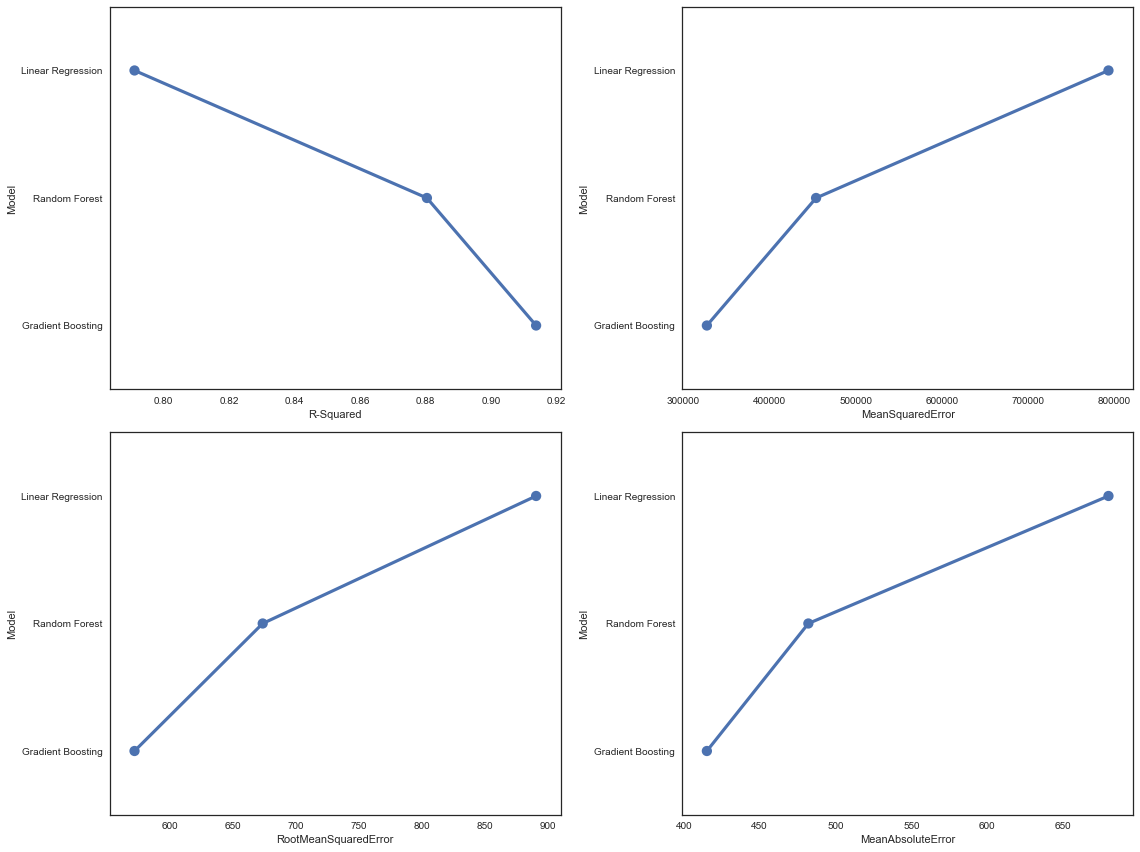

In [237]:
#------ Comparing the performance matrix values of the models-----
fig, saxis = plt.subplots(2, 2,figsize=(16,12))
a=sn.pointplot(y='Model', x='R-Squared', rotate =90,data=df_mod_performance, markers='o', linestyles='-', dodge=False, join=True,ax = saxis[0,0])
#a.set_xticklabels(a.get_xticklabels(), rotation=45)
sn.pointplot(y='Model', x='MeanSquaredError', data=df_mod_performance, markers='o', linestyles='-', dodge=False, join=True,ax = saxis[0,1])
sn.pointplot(y='Model', x='RootMeanSquaredError', data=df_mod_performance, markers='o', linestyles='-', dodge=False, join=True,ax = saxis[1,0])
sn.pointplot(y='Model', x='MeanAbsoluteError', data=df_mod_performance, markers='o', linestyles='-', dodge=False, join=True,ax = saxis[1,1])
plt.tight_layout()

In [ ]:
#What can be inferred from above observations:
#-->It is evidently clear that gradient boost gives the best performance out of all the models
#-->Hence we'll consider Gradient Boosting as our final model

In [ ]:
#---------Part 6 : Model comparisions ENDS here ---------------------

In [ ]:
#---------Part 7 : Hypertune the selected model starts here ------------

#Now, Gradient Boosting is the final model, parameter hypertuning can be performed on the model to find the best parameters which will give the maximum performance.
#Functions like GRIDSearchCV from GridSearch library of python can be used for this.

#However, I tried here simple approach of ‘hit and trial’, where I changed parameter few times and found a set which gave me maximum performance.

#Before parameter tuning:
#-----> Gradient Boosting
#-----> R-Squared :0.897838
#-----> MSE: 387939.616482
#-----> RMSE: 622.847988
#-----> MAE: 460.576495

#Before parameter tuning:
#-----> Gradient Boosting
#-----> R-Squared :0.913779
#-----> MSE: 327408.191428
#-----> RMSE: 572.195938
#-----> MAE: 415.264316

#Evident here, hypertuning the parameter boosted the model performance. So, we lock the parameters as below:
#-->loss='ls',
#-->learning_rate=0.1, 
#-->n_estimators=300, 
#-->subsample=1.0, 
#-->criterion='friedman_mse', 
#-->min_samples_split=2, 
#-->min_samples_leaf=1, 
#-->min_weight_fraction_leaf=0.0, 
#-->max_depth=3, 
#-->min_impurity_decrease=0.0, 
#-->min_impurity_split=None, 
#-->init=None, 
#-->random_state=1, 
#-->max_features=None, 
#-->alpha=0.9, 
#-->verbose=0, 
#-->max_leaf_nodes=100, 
#-->warm_start=False, 
#-->presort='auto'

#Lets produce the output using this model

#---------Part 7 : Hypertune the selected model ENDS here ------------

In [ ]:
#--------Part 8 : Produce sample output with tuned model STARTS here----------------------

In [238]:
final_bike_prediction_df=X_test
final_bike_prediction_df['ActualCount'] = Y_test
final_bike_prediction_df['PredictedCount'] = Y_predict_xgb
final_bike_prediction_df['PredictedCount'] = round(final_bike_prediction_df['PredictedCount'])
#--- Sample output(with actual counts and predicted counts) ---
final_bike_prediction_df

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,date,ActualCount,PredictedCount
261,3,0,9,0,1,1,2,0.529675,0.690000,0.151742,19,4539,4326.0
236,3,0,8,0,4,1,2,0.645854,0.771667,0.210833,25,3542,4213.0
327,4,0,11,1,4,0,1,0.372471,0.549167,0.167304,24,1495,2760.0
163,2,0,6,0,1,1,1,0.601654,0.494583,0.305350,13,5020,4941.0
479,2,1,4,0,2,1,1,0.405283,0.454167,0.249383,24,5633,5575.0
267,4,0,9,0,0,0,2,0.572637,0.845000,0.050379,25,5010,4779.0
196,3,0,7,0,6,0,1,0.638263,0.585000,0.208342,16,5923,5039.0
131,2,0,5,0,4,1,1,0.523363,0.747500,0.189667,12,4864,4204.0
648,4,1,10,0,3,1,1,0.503142,0.630833,0.187821,10,7691,7601.0
329,4,0,11,0,6,0,1,0.385087,0.681667,0.068421,26,3068,4129.0


In [239]:
final_bike_prediction_df.to_csv("D:/DataScience_Edwisor/edWisor/Projects/Bike_Rental/bike_rental_sample_output.csv", index=False)

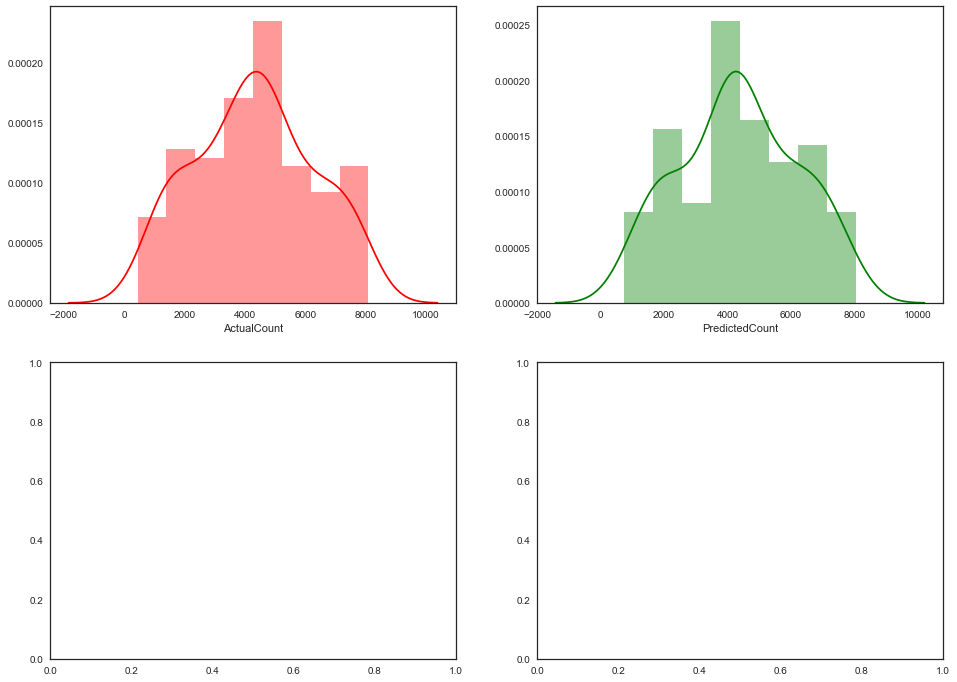

In [240]:
#-----Plotting the distributions of 'ActualCount' and 'PredictedCount'
fig, saxis = plt.subplots(2, 2,figsize=(16,12))
sn.distplot(final_bike_prediction_df["ActualCount"],color ='r', ax = saxis[0,0])
sn.distplot(final_bike_prediction_df["PredictedCount"],color ='g',ax = saxis[0,1])

#--- As clearly evident from the below charts the distributions of both the counts are very similar.
#--This seems a fair model